# **Introduction**

- In recent years, **Diffusion Models** have emerged as one of the most influential advances in generative AI. Unlike traditional discriminative models that classify or detect objects, diffusion models can **generate entirely new data samples**, from handwritten digits to realistic human faces or detailed artwork.
<div align="center">
  <img src="https://cdn.goenhance.ai/user/2024/07/12/0a2640eb-1120-42e1-8478-eb2a5c19367b_0.jpg" alt="Diffusion Process" width="500"/>
</div>

- The core concept of a diffusion model is simple yet powerful:  
  it **learns to reverse a gradual noising process**.  
  During training, clean images are repeatedly corrupted with Gaussian noise step by step (the *forward process*), and the model learns to remove this noise (the *reverse process*).  
  After sufficient training, the model can start from pure noise and denoise it back into a meaningful image.

- This principle forms the foundation of many recent breakthroughs, including **Stable Diffusion**, **DALL·E 3**, and **Midjourney**, which can generate high-quality images from text prompts.  
  Beyond image synthesis, diffusion models are also applied in:
  - **Audio and speech generation**, producing natural and high-fidelity sounds.  
  - **Medical imaging**, restoring noisy or incomplete scans.  
  - **3D and video generation**, extending diffusion to spatial and temporal domains.

- In this Lab, you will implement a simplified **Denoising Diffusion Probabilistic Model (DDPM)** using the **MNIST** handwritten digit dataset, focusing directly on **label-conditioned (conditional) generation**.  
  - Train a **conditional DDPM** that generates digits *conditioned* on given labels (0–9).  
  - Use the trained model to generate one image per label specified in `digits.csv`.  
  - Package your generated images in the required folder structure for automatic evaluation.

- By completing this lab, you will:
  1. Understand the core mathematical foundation and training mechanism of diffusion models.  
  2. Learn how to perform **conditional generation** by incorporating label information into a diffusion model.  
  3. Build a small yet complete generative modeling pipeline that supports **automatic evaluation** based on your generated images.


<div align="center">
    <img src="https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png" alt="Diffusion Process" width="500"/>
</div>

# **Environment**

Similar to the previous lab, we will use `.ipynb` (Jupyter Notebook) files, and we recommend using Anaconda.  
This is also a good opportunity for you to get familiar with Anaconda, since our coding exam will use the same environment.

If you are unsure about a function or its parameters, you can use `help()` to view the documentation.  
For example: `help(torch.randn)` or `help(datasets.MNIST)`.


In this Lab 6, just like in Lab 4, we will use an important deep learning framework — **PyTorch**.  
PyTorch is a Python library for building and training neural networks, and it provides the following functionalities:

- Creating and managing datasets (**Dataset**, **DataLoader**)
- Constructing neural network models (such as the UNet-like architecture used in this lab)
- Defining optimizers (**Optimizer**) and loss functions (**Loss Function**)
- Implementing the training loop and the sampling (generation) process

The steps to install PyTorch are as follows:

- PyTorch supports CUDA-based (NVIDIA) GPUs and CPUs.  
  You can use `nvidia-smi` in the command line to check the CUDA version of your GPU.

- Install the corresponding version of the **CUDA Toolkit** based on your GPU’s CUDA version.  
  If you do not have a GPU, you can skip this step.

  Official CUDA installation guide:  
  https://docs.nvidia.com/cuda/cuda-installation-guide-microsoft-windows/contents.html#

  Official CUDA Toolkit archive:  
  https://developer.nvidia.com/cuda-toolkit-archive

- Then, install the corresponding version of **PyTorch** based on your GPU’s CUDA version.  
  If you do not have a GPU, install the **CPU version of PyTorch**  

  Official PyTorch installation guide:  
  https://pytorch.org/get-started/locally/


# **Requirements**

- **Files you will receive for Lab 6:**  
  1. `Lab6.ipynb` — the notebook you must complete.  
  2. `digits.csv` — the file contains one digit label per row. This is the file you will later use to generate images.  
  3. Pretrained model weights:  
     - `cond_unet_pretrained.pt` (conditional DDPM)  
     - `mnist_classifier_public.pt` (public MNIST classifier)  
  Please keep all files in the **same folder** and **do not rename** them.

- **Complete the lab individually!** Group work is **not allowed** (group collaboration applies **only to the final project**).

- **Submission deadline:** 2025/12/04 23:59 (**No late submissions will be accepted!**)

- Please submit the following files on eeclass:
  1. `Lab6.ipynb`  
  2. A **compressed file** `Lab6_outputs_{studentID}.zip` (e.g., Lab6_outputs_111011101.zip) containing the folder of generated images according to `digits.csv`.

- **Important:** The content of **Lab 6** will be included in the **next programming exam**.

- Responsible TA: Chi-Wei Lee (levi74108520963@gmail.com)
	- Email for questions or visit EECS 639 during TA hours.
	- No debugging service


# **Penalty Rules**

0 points if any of the following conditions happened
- Plagiarism
- Late submission
- Not using the template or importing any other packages
- No code (Lab6.ipynb) submission on eeclass
- No prediction files (Lab6_outputs_{studentID}.zip) submission on eeclass
- Your submission was not generated by your code
- Adding/modifying code **outside** `#TODO:` regions in the notebook, **except for minor parameter adjustments**.


5 points will be deducted if your submission format is incorrect.


# **Lab 6 Overview**

In this lab, you will implement one complete conditional diffusion model pipeline:

- Use the **MNIST** handwritten digit dataset (28×28, labels 0–9).
- Implement a simplified **Denoising Diffusion Probabilistic Model (DDPM)**.
- Train a **label-conditioned DDPM** that, given a digit label \\( y \in \{0, \dots, 9\} \\), generates a corresponding digit image from pure Gaussian noise.
- Use the trained model and the provided `digits.csv` to generate **one image per row** for automatic evaluation.

Design philosophy: we provide most of the boilerplate (data loading, utilities, structure hints),  
so you can **focus on understanding and implementing the core conditional DDPM logic**.

## Grading Policy (100%)

- **(A) Core DDPM Components (Complete Step 1~6) – 25%**
  - Complete all required TODOs in:
    - diffusion schedule & forward process,
    - time embedding,
    - conditional UNet definition,
    - training helper functions.
  - The notebook should run correctly up to the basic sampling demo. As shown in the figure below, it should produce the following image.

    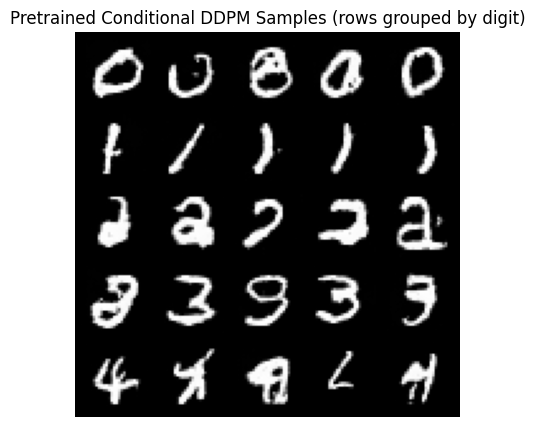

- **(B) Conditional Pipeline & Generation (Complete Step 7~8) – 30%**
  - Fine-tune on MNIST as instructed.
  - Use `generate_images_from_csv` to create one image per row in `digits.csv`,
    saved under `Lab6_outputs_{studentID}/` with filenames `{idx:04d}.png`.
  - Full points if the pipeline runs end-to-end without error.

- **(C) Public Evaluation (Step 9) – 30%**
  - Run the provided public classifier on your generated images.
  - If accuracy ≥ 80% → full 30%.

- **(D) Private Evaluation (Step 10) – 10%**
  - A hidden classifier is applied to your submitted `Lab6_outputs_{studentID}.zip`.
  - If your generated images achieve at least 70% accuracy on the private test set, you will receive the full 10 points.

- **(E) Report Questions – 5%**
  - Full points only if answers are correct, clear, and concise.



## Import Packages

Run the following cell to set up the environment.

⚠️ You cannot import any other package


 ⭐ The following cell contains no TODOs.

In [ ]:
import os
import math
import random
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Subset
from torchvision import datasets, transforms
from torchvision.utils import save_image, make_grid

def seed_everything(seed: int = 42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

seed_everything(42)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)



## Global Attributes

Define global hyperparameters and paths used in this lab.


In [ ]:
LAB_NAME = "Lab6"
DATA_DIR = "./data"
# TODO: Input your studentID
OUTPUT_DIR = "./Lab6_outputs_{studentID}"
os.makedirs(DATA_DIR, exist_ok=True)
os.makedirs(OUTPUT_DIR, exist_ok=True)

IMG_SIZE = 28 # Do NOT modify!
IMG_CHANNELS = 1 # Do NOT modify!

# Diffusion settings
T = 1000 # Do NOT modify! # number of diffusion steps
BATCH_SIZE = 64         # you could modify batch size
TRAIN_SIZE = 50_000     # you could modify subset of MNIST

print(f"T = {T}, batch_size = {BATCH_SIZE}, train_size = {TRAIN_SIZE}")



## Load the Input File: `digits.csv`

For final grading, we will provide a `digits.csv` file with the following format:

```csv
label
3
7
0
9
...
```

- Each row contains one target digit label (0–9).
- Your task is to use the conditional DDPM model to generate exactly one 28×28 grayscale image for each row.
- The generated images will be saved into a folder (Lab6_outputs_{studentID}/) and later zipped for submission and public evaluation & private evaluation.

The following cell:

Tries to load `digits.csv` from the current directory.



 ⭐ The following cell contains no TODOs.

In [ ]:
digits_csv_path = os.path.join(".", "digits.csv")
digits_df = pd.read_csv(digits_csv_path)
print("digits.csv preview:")
display(digits_df.head())


digits.csv preview:


,label
0,6
1,3
2,7
3,4
4,6


# Conditional DDPM on MNIST

In this lab, you will work with a **conditional Denoising Diffusion Probabilistic Model (DDPM)** on the MNIST handwritten digit dataset.

Rather than training a large diffusion model from scratch (which is computationally expensive), we provide a **pretrained conditional DDPM**.  
Your main tasks are to:

1. **Load and inspect the MNIST training set** and understand the input format (28×28 grayscale digits with labels 0–9).
2. **Understand the diffusion process utilities**:
- How to define the noise schedule $\beta_t$, $\alpha_t$, $\bar{\alpha}_t$.
- How to sample noisy images $x_t$ from clean images $x_0$.
3. **Understand the conditional DDPM architecture**:
   - How timestep embeddings and digit label embeddings are injected into the UNet-like model.
4. **Load the pretrained conditional DDPM weights (cond_unet_mnist_pretrained.pt)**
   - **fine-tune** the model on MNIST using the DDPM noise-prediction objective.
5. **Use the conditional DDPM to generate images**:
   - Given a `digits.csv` file containing target labels,
   - Generate **one 28×28 grayscale image per label**,
   - Save them in the required folder for public evaluation by a classifier.

Through this process, you will focus on the **core ideas of diffusion models**:
- learning to predict noise,
- running the reverse denoising process,
- and conditioning generation on class labels (0–9),
while keeping the computation feasible on a CPU-based environment.


## Step 1: MNIST Dataset & DataLoader

In [ ]:
## Define the transform for MNIST images
## TODO: Define the transform for MNIST: resize to (IMG_SIZE, IMG_SIZE), convert to tensor, normalize to [-1, 1].
transform = transforms.Compose(...)

## TODO: Load the MNIST training set with the above transform
mnist_train = datasets.MNIST(...)


if TRAIN_SIZE is not None and TRAIN_SIZE < len(mnist_train):
    indices = list(range(len(mnist_train)))
    random.shuffle(indices)
    indices = indices[:TRAIN_SIZE]
    mnist_train = Subset(mnist_train, indices)

train_loader = DataLoader(
    mnist_train,
    batch_size=BATCH_SIZE,
    shuffle=True,
    drop_last=True,
)

print(f"Train dataset size: {len(mnist_train)}")


Quuick sanity check – visualize one random MNIST image and its label

 ⭐ The following cell contains no TODOs.

Random sample index: 7022
Label: 4


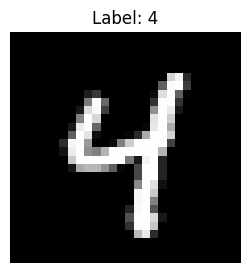

In [ ]:
# Randomly pick one sample from the (possibly subsetted) training set
idx = random.randint(0, len(mnist_train) - 1)
img, label = mnist_train[idx]

print(f"Random sample index: {idx}")
print(f"Label: {label}")

# img is normalized to [-1, 1], convert back to [0, 1] for visualization
img_vis = (img * 0.5 + 0.5).squeeze(0).numpy()

plt.figure(figsize=(3, 3))
plt.imshow(img_vis, cmap="gray")
plt.axis("off")
plt.title(f"Label: {label}")
plt.show()

## Step 2: Diffusion Utilities (Forward Process)

We define the core quantities of the forward diffusion process:

- $\beta_t$: the noise schedule at step $t$.
- $\alpha_t = 1 - \beta_t$.
- $\bar{\alpha}_t = \prod_{s=1}^t \alpha_s$ (the cumulative product of alphas up to step $t$).

Using these, the forward diffusion process  
$q(x_t \mid x_0)$ has the following closed-form expression:

$$
x_t = \sqrt{\bar{\alpha}_t}\, x_0 + \sqrt{1 - \bar{\alpha}_t}\, \varepsilon,
\quad \varepsilon \sim \mathcal{N}(0, I)
$$

In code, we will implement this as a function `q_sample(x0, t, noise)`,  
which takes a clean image $x_0$, a timestep $t$, and a sampled noise tensor $\varepsilon$,  
and returns the corresponding noised image $x_t$.


In [ ]:

## Implement DDPM Coefficients and Forward Noising

def make_beta_schedule(T, beta_start=1e-4, beta_end=2e-2):
    """
    Create a linear beta schedule:
    - T: total number of diffusion steps
    - beta_start: noise level at t=1
    - beta_end: noise level at t=T
    Returns a 1D tensor of length T.
    """
    # TODO: linearly interpolate from beta_start to beta_end with length T
    betas = torch.linspace(...)
    return betas

betas = make_beta_schedule(T).to(device)
## TODO: Define alphas and cumulative alpha_bars based on betas
# alphas_t = 1 - betas_t
alphas = ...
# alpha_bar_t = prod_{s=1}^t alphas_s
alpha_bars = torch.cumprod(...)

print("Check shapes:", betas.shape, alphas.shape, alpha_bars.shape)

def q_sample(x0, t, noise):
    """
    Forward diffusion (q(x_t | x_0)):
    x_t = sqrt(alpha_bar_t) * x0 + sqrt(1 - alpha_bar_t) * noise

    Args:
        x0:    clean images, shape [B, 1, 28, 28]
        t:     timesteps for each sample, shape [B], values in [0, T-1]
        noise: Gaussian noise, shape [B, 1, 28, 28]

    Returns:
        x_t:   noised images at the given timesteps, shape [B, 1, 28, 28]
    """
    # alpha_bar_t for each sample in the batch: shape [B, 1, 1, 1]
    a_bar_t = alpha_bars[t].view(-1, 1, 1, 1)

    # TODO: apply the closed-form equation using a_bar_t, x0 and noise
    x_t = ...
    return x_t


Visualize forward diffusion step-by-step

⭐ The following cell contains no TODOs.

In [ ]:
import matplotlib.pyplot as plt

def show_forward_diffusion(x0, steps=[0, 200, 400, 600, 800, 999]):
    """
    x0: a batch of clean images [B, 1, H, W]
    steps: which timesteps to visualize
    """

    # ensure x0 on device
    x0 = x0.to(device)

    # select first image of the batch for visualization
    x0_single = x0[0:1]  # shape [1, 1, H, W]

    fig, axes = plt.subplots(1, len(steps), figsize=(15, 3))

    for i, t in enumerate(steps):
        t_tensor = torch.tensor([t], device=device).long()
        noise = torch.randn_like(x0_single)
        x_t = q_sample(x0_single, t_tensor, noise)

        axes[i].imshow(x_t[0, 0].detach().cpu(), cmap='gray')
        axes[i].set_title(f"t = {t}")
        axes[i].axis("off")

    plt.tight_layout()
    plt.show()

# Take one batch from your dataloader
x0_batch, _ = next(iter(train_loader))
show_forward_diffusion(x0_batch)



## Step 3: Time Embedding

To make the model aware of the diffusion timestep \(t\), we use a **sinusoidal time embedding** similar to those used in Transformers.

This embedding will later be combined with the label embedding in our conditional DDPM.


⭐ The following cell contains no TODOs.

In [ ]:
## Sinusoidal time embedding

class SinusoidalTimeEmbedding(nn.Module):
    def __init__(self, dim: int):
        super().__init__()
        self.dim = dim

    def forward(self, t: torch.Tensor):
        # t: [B]
        half = self.dim // 2
        freqs = torch.exp(
            -math.log(10_000) * torch.arange(0, half, dtype=torch.float32, device=t.device) / float(half)
        )
        args = t.float().unsqueeze(1) * freqs.unsqueeze(0)
        emb = torch.cat([torch.sin(args), torch.cos(args)], dim=1)
        if self.dim % 2 == 1:
            emb = torch.cat([emb, torch.zeros_like(emb[:, :1])], dim=1)
        return emb



## Step 4: Conditional DDPM & Digit-conditioned Generation

Unconditional diffusion can generate "digit-like" images, but cannot control *which* digit appears.

We now build a **conditional DDPM** that:

1. Uses a time embedding for the diffusion step.
2. Uses a label embedding for the digit class (0–9).
3. Combines them to predict the noise for each `(x_t, t, y)` pair.
4. Allows us to sample images **conditioned** on a desired digit label.



### 4.1 Conditional Tiny UNet

We extend the network with:

- A time embedding from `SinusoidalTimeEmbedding`.
- A learnable label embedding `nn.Embedding(num_classes, time_dim)`.
- The sum `cond = t_emb + y_emb` is injected into intermediate layers.

Fill in / read the implementation below to see how conditioning is applied.

Conditional Tiny UNet Architecture:
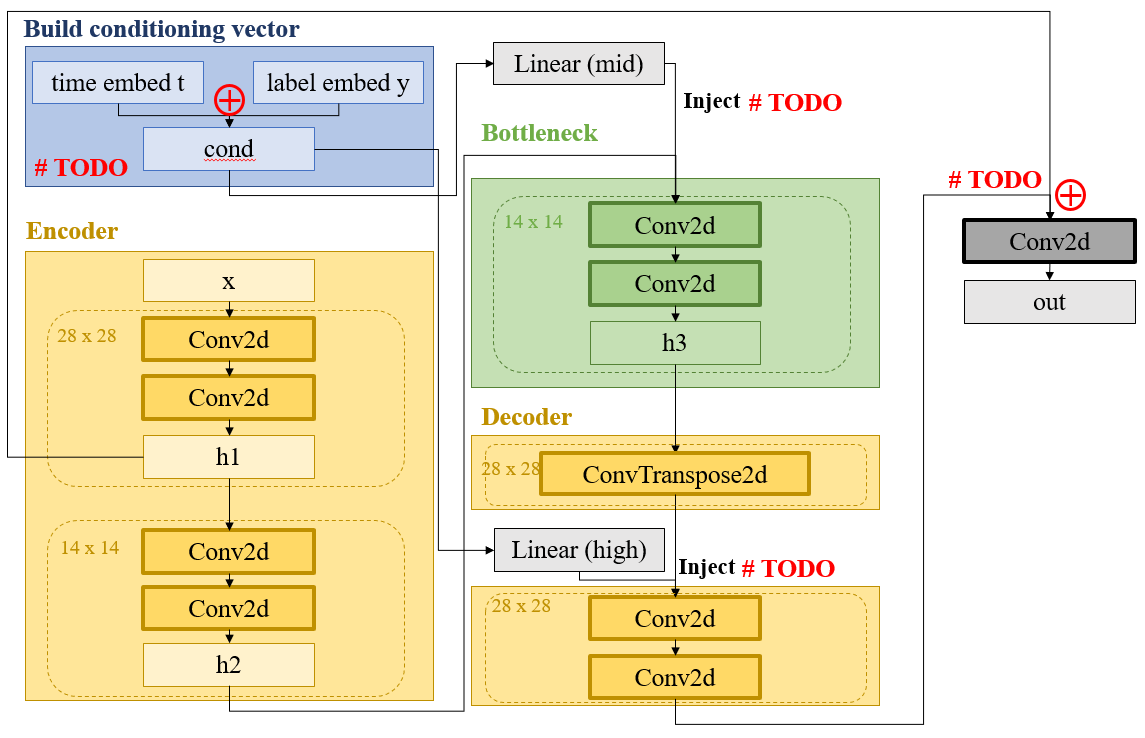

In [ ]:
## Conditional Tiny UNet

class CondTinyUNet(nn.Module):
    """
    A small UNet-like architecture for conditional DDPM on MNIST.

    - Input:  noised image x_t (shape [B, 1, 28, 28]),
              timestep t (shape [B]),
              label y in {0,...,9} (shape [B]).
    - Output: predicted noise with the same shape as x_t.

    Conditioning:
    - t is embedded by SinusoidalTimeEmbedding + MLP  -> time embedding (time_dim)
    - y is embedded by nn.Embedding                  -> label embedding (time_dim)
    - We sum them to get `cond` (shape [B, time_dim]),
      then inject `cond` into:
        - low-resolution features (14x14, 2C channels)
        - high-resolution features (28x28, C channels)
    """

    def __init__(self, in_channels=1, base_channels=32, time_dim=64, num_classes=10):
        super().__init__()

        # ----- Time + label embedding -----
        self.time_mlp = nn.Sequential(
            SinusoidalTimeEmbedding(time_dim),
            nn.Linear(time_dim, time_dim),
            nn.ReLU(),
        )
        self.label_emb = nn.Embedding(num_classes, time_dim)

        # ----- Encoder -----
        # Level 1: 28x28

        # TODO: Implement the first convolution in the encoder (enc1_1).
        #  - Input: the noisy image x_t, which has `in_channels` channels (for MNIST, this will be 1).
        #  - Output: feature maps with `base_channels` channels.
        #  - Use a 3x3 kernel and padding such that the spatial size stays 28x28.
        #  Hint: nn.Conv2d(in_channels, out_channels, kernel_size, padding=...)
        self.enc1_1 = nn.Conv2d(...)

        # TODO: Implement the second convolution in the encoder (enc1_2).
        #  - Input: feature maps from enc1_1, which already have `base_channels` channels.
        #  - Output: keep the number of channels as `base_channels`.
        #  - Also use a 3x3 kernel with padding that keeps the spatial size unchanged (28x28).
        self.enc1_2 = nn.Conv2d(...)

        # Level 2: 28x28 -> 14x14
        self.enc2_1 = nn.Conv2d(base_channels, base_channels * 2, 3, stride=2, padding=1)
        self.enc2_2 = nn.Conv2d(base_channels * 2, base_channels * 2, 3, padding=1)

        # ----- Bottleneck (14x14) -----
        self.bot_1 = nn.Conv2d(base_channels * 2, base_channels * 2, 3, padding=1)
        self.bot_2 = nn.Conv2d(base_channels * 2, base_channels * 2, 3, padding=1)

        # ----- Decoder -----
        # Upsample: 14x14 -> 28x28
        self.dec1_up = nn.ConvTranspose2d(base_channels * 2, base_channels, 4, stride=2, padding=1)
        self.dec1_1 = nn.Conv2d(base_channels, base_channels, 3, padding=1)
        self.dec1_2 = nn.Conv2d(base_channels, base_channels, 3, padding=1)

        # Final conv: predict noise
        self.conv_out = nn.Conv2d(base_channels, in_channels, 3, padding=1)

        self.act = nn.ReLU()

        # Project conditioning vector `cond` into channel dimensions
        self.time_to_c_mid = nn.Linear(time_dim, base_channels * 2)  # for 14x14 feature maps
        self.time_to_c_high = nn.Linear(time_dim, base_channels)     # for 28x28 feature maps

    def forward(self, x, t, y):
        # TODO: Build conditioning vector cond = time_embedding(t) + label_embedding(y)
        t_emb = ...      # [B, time_dim]
        y_emb = ...      # [B, time_dim]
        cond = ...       # [B, time_dim]

        # ----- Encoder -----
        # 28x28
        h1 = self.act(self.enc1_1(x))
        h1 = self.act(self.enc1_2(h1))      # [B, C, 28, 28]

        # 28x28 -> 14x14
        h2 = self.act(self.enc2_1(h1))
        h2 = self.act(self.enc2_2(h2))      # [B, 2C, 14, 14]

        # TODO: Inject cond into low-resolution features (14x14, 2C channels)
        c_mid = self.time_to_c_mid(...).view(-1, h2.size(1), 1, 1)                         # project cond to [B, 2C, 1, 1]
        h2 = ...                            # add conditioning to h2

        # ----- Bottleneck -----
        h3 = self.act(self.bot_1(h2))
        h3 = self.act(self.bot_2(h3))       # [B, 2C, 14, 14]

        # ----- Decoder -----
        up = self.act(self.dec1_up(h3))     # [B, C, 28, 28]

        # TODO: Inject cond into high-resolution features (28x28, C channels)
        c_high = self.time_to_c_high(...).view(-1, up.size(1), 1, 1)                        # project cond to [B, C, 1, 1]
        up = ...                            # add conditioning to up

        # Refine + skip connection
        up = self.act(self.dec1_1(up))
        up = self.act(self.dec1_2(up))
        # TODO: Add skip connection from encoder (h1) to decoder (up)
        up = ...

        # Predict noise
        out = self.conv_out(self.act(up))
        return out


## Step 5: DDPM Training Objective (for Conditional Model)

In a conditional DDPM, the model learns from pairs $(x_0, y)$, where:

- $x_0$ is a clean MNIST digit image  
- $y \in \{0, \dots, 9\}$ is its label  

At each training step, we:

1. **Sample a random timestep** $t \sim \text{Uniform}(\{0, \dots, T-1\})$  
2. **Sample Gaussian noise** $\varepsilon \sim \mathcal{N}(0, I)$  
3. **Construct a noised image** using the forward process:  
   $$
   x_t = \sqrt{\bar{\alpha}_t}\, x_0
       + \sqrt{1 - \bar{\alpha}_t}\, \varepsilon
   $$
4. **Predict the noise** with the conditional model:  
   $$
   \varepsilon_\theta(x_t, t, y)
   $$
5. **Optimize the MSE loss** between the predicted and true noise:  
   $$
   \mathcal{L} = \mathbb{E}\left[ \left\| \varepsilon_\theta(x_t, t, y) - \varepsilon \right\|^2 \right]
   $$

This is the core DDPM training objective:
- The model does **not** directly predict a clean image.  
- Instead, it learns to predict the **added noise** at each timestep.

In this lab:
- We provide a **pretrained conditional DDPM** trained with this objective.  
- Later, you’ll see a helper function `ddpm_cond_train_epoch(...)` implementing this loop.  
- You may **fine-tune** the model on CPU using the same objective to improve or adapt it.


In [ ]:
## DDPM training step (used for optional fine-tuning below)

def ddpm_cond_train_epoch(model, dataloader, optimizer):
    model.train()
    total_loss = 0.0
    for x0, y in dataloader:
        x0 = x0.to(device)
        y = y.to(device)
        B = x0.size(0)

        # TODO: Sample a random timestep t for each sample in the batch
        # Hint: integers in [0, T-1], shape [B]
        t = torch.randint(...)

        # TODO: Sample Gaussian noise with the same shape as x0
        noise = torch.randn_like(...)

        # TODO: Apply forward diffusion q(x_t | x_0, t)
        x_t = q_sample(...)

        # TODO: Predict noise with the conditional UNet
        eps_pred = model(...)

        # TODO: Compute MSE loss between predicted noise and true noise
        loss = F.mse_loss(...)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * B

    return total_loss / len(dataloader.dataset)


## Step 6: Conditional Sampling (Reverse Process)

Once the conditional DDPM has been trained, we can **sample** images by running the diffusion process **backward**.

Starting from pure Gaussian noise $x_T \sim \mathcal{N}(0, I)$, we iteratively apply

$$
x_{t-1} \sim p_\theta(x_{t-1} \mid x_t, t, y),
\quad t = T, T-1, \dots, 1,
$$

where $y$ is the target digit label ($0$–$9$), and $p_\theta$ is parameterized by our conditional UNet.

In practice, we implement this reverse process using two functions:

1. **`p_sample_step_cond(model, x_t, t, y)`**

   - Performs **one reverse diffusion step**:
     - uses the model to predict the noise $\varepsilon_\theta(x_t, t, y)$,
     - computes the mean of $p_\theta(x_{t-1} \mid x_t)$,
     - adds the appropriate Gaussian noise (except at $t = 0$),
     - returns a sample $x_{t-1}$.

2. **`sample_conditional(model, num_samples, digit)`**

   - Generates samples **conditioned on a specific digit label**:
     - starts from random noise $x_T$,
     - repeatedly calls `p_sample_step_cond` from $t = T-1$ down to $0$,
     - returns the final denoised images $x_0$ in $[0, 1]$.

These sampling functions will be:

- used to **visualize** the pretrained model
- later reused **after you fine-tune the pretrained model**, so you can observe improved generation quality and
  experience the DDPM training process in practice.



⭐ The following cell contains no TODOs.

In [ ]:
## Load Pretrained Conditional DDPM & Sampling Functions

PRETRAINED_PATH = "./cond_unet_mnist_pretrained.pt"

cond_unet = CondTinyUNet(
    in_channels=IMG_CHANNELS,
    base_channels=32,
    time_dim=64,
    num_classes=10
).to(device)

state_dict = torch.load(PRETRAINED_PATH, map_location=device)
cond_unet.load_state_dict(state_dict)
cond_unet.eval()
print("[Info] Loaded pretrained conditional DDPM from:", PRETRAINED_PATH)
print("Model device:", next(cond_unet.parameters()).device)

# ===== Conditional DDPM reverse sampling utilities =====

@torch.no_grad()
def p_sample_step_cond(model, x_t, t, y):
    """
    One reverse diffusion step:
    Given x_t, timestep t, and label y,
    compute a sample of x_{t-1} using the DDPM posterior formula.
    """
    beta_t = betas[t].view(-1, 1, 1, 1)
    alpha_t = alphas[t].view(-1, 1, 1, 1)
    alpha_bar_t = alpha_bars[t].view(-1, 1, 1, 1)
    alpha_bar_prev = alpha_bars[torch.clamp(t - 1, 0)].view(-1, 1, 1, 1)

    # Use the conditional UNet to predict the noise for x_t at timestep t with label y.
    eps_theta = model(x_t, t, y)

    # Implement β̃_t
    beta_tilde = (1.0 - alpha_bar_prev) / (1.0 - alpha_bar_t) * beta_t # β̃_t = (1 - ᾱ_{t-1}) / (1 - ᾱ_t) * β_t
    # Implement μ_θ(x_t, t, y)
    mean = (1.0 / torch.sqrt(alpha_t)) * (
        x_t - ((1.0 - alpha_t) / torch.sqrt(1.0 - alpha_bar_t)) * eps_theta # μ_θ  = 1 / sqrt(α_t) * [ x_t - ((1 - α_t) / sqrt(1 - ᾱ_t)) * ε_θ(x_t, t, y) ]
    )

    # Sample x_{t-1}; no noise at t=0
    noise = torch.randn_like(x_t)
    nonzero_mask = (t > 0).float().view(-1, 1, 1, 1)
    x_prev = mean + nonzero_mask * torch.sqrt(beta_tilde) * noise
    return x_prev

@torch.no_grad()
def sample_conditional(model, num_samples, digit):
    """
    Generate num_samples images conditioned on a target digit label.
    Start from Gaussian noise x_T and iteratively apply p_sample_step_cond.
    """
    model.eval()
    x_t = torch.randn(num_samples, 1, IMG_SIZE, IMG_SIZE, device=device)
    y = torch.full((num_samples,), int(digit), device=device, dtype=torch.long)

    for step in reversed(range(T)):
        t = torch.full((num_samples,), step, device=device, dtype=torch.long)
        x_t = p_sample_step_cond(model, x_t, t, y)

    # Map back from [-1, 1] to [0, 1] for visualization / saving
    x0 = (x_t.clamp(-1, 1) + 1) / 2.0
    return x0

# ===== Quick demo: visualize pretrained model generations =====

demo_digits = [0, 1, 2, 3, 4]
demo_imgs = []
for d in demo_digits:
    imgs = sample_conditional(cond_unet, num_samples=5, digit=d)
    demo_imgs.append(imgs)
demo_imgs = torch.cat(demo_imgs, dim=0)

grid = make_grid(demo_imgs, nrow=5)
plt.figure(figsize=(5, 5))
plt.axis("off")
plt.title("Pretrained Conditional DDPM Samples (rows grouped by digit)")
plt.imshow(grid.permute(1, 2, 0).cpu().numpy(), cmap="gray")
plt.show()


## Step 7: Fine-tune the Pretrained Conditional DDPM

In the previous step, we loaded a **pretrained conditional DDPM** trained on MNIST.

In this step, you will **continue training (fine-tune)** this model on your local machine using the
DDPM noise-prediction objective. This serves two purposes:

1. Let you **experience the actual training process of a diffusion model**:
   - randomize a timestep $t$,
   - add noise to a clean image $x_0$ to obtain $x_t$,
   - predict the noise $\varepsilon_\theta(x_t, t, y)$,
   - minimize the MSE between predicted and true noise.

2. Slightly **improve or adapt** the pretrained model while keeping the computation feasible on CPU.

Notes:

- Please **run this fine-tuning cell** as part of the lab.
- You may adjust `FINETUNE_EPOCHS` depending on your environment:
  - more epochs $\rightarrow$ potentially better samples, longer training time;
  - fewer epochs $\rightarrow$ faster but with smaller changes.
- The updated `cond_unet` after fine-tuning will be used in the later steps
  (image generation for `digits.csv` and classifier-based evaluation).


In [ ]:
## Fine-tune the Pretrained Model on CPU and Visualize

FINETUNE_EPOCHS = 10        # you could modify by yourself # keep this small for CPU
FINETUNE_LR = 1e-4          # Do Not modify!

optimizer_ft = torch.optim.Adam(cond_unet.parameters(), lr=FINETUNE_LR)

print("[Info] Start fine-tuning from pretrained weights...")
ft_loss_history = []

for epoch in range(1, FINETUNE_EPOCHS + 1):
    # TODO: Run one epoch of conditional DDPM training using your helper function.
    avg_loss = ddpm_cond_train_epoch(...)

    ft_loss_history.append(avg_loss)
    print(f"[Fine-tune Epoch {epoch}/{FINETUNE_EPOCHS}] loss = {avg_loss:.6f}")

# Plot fine-tuning loss
plt.figure()
plt.plot(ft_loss_history, marker="o")
plt.xlabel("Fine-tune Epoch")
plt.ylabel("MSE Loss")
plt.title("Conditional DDPM Fine-tuning Loss (from Pretrained)")
plt.grid(True)
plt.show()

# Generate samples again after fine-tuning
demo_digits = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
demo_imgs = []
for d in demo_digits:
    imgs = sample_conditional(cond_unet, num_samples=4, digit=d)
    demo_imgs.append(imgs)
demo_imgs = torch.cat(demo_imgs, dim=0)

grid = make_grid(demo_imgs, nrow=4)
plt.figure(figsize=(6, 8))
plt.axis("off")
plt.title("Conditional DDPM Samples After Fine-tuning (each row = one digit)")
plt.imshow(grid.permute(1, 2, 0).cpu().numpy(), cmap="gray")
plt.show()


## Step 8: Generate Images According to `digits.csv`

Now we connect everything together:

1. Read labels from `digits.csv`.
2. For each row index `i` and label `y`, generate **one image** conditioned on `y`
   using the current conditional DDPM model (`cond_unet`).
3. Save each image to `./Lab6_outputs_{studentID}/` with filename `"{i:04d}.png"`.

**Important notes:**

- Make sure you have **loaded the pretrained model** (and completed the fine-tuning step above).
- This step uses the **current** `cond_unet` in memory:
  - if you fine-tuned it, the generated images will reflect your updated model;
  - if you did not, it will use the pretrained weights as-is.

**For submission:**

- Use the official `digits.csv` provided on the course platform.
- Run this step to generate all images.
- Zip the `Lab6_outputs_{studentID}` folder as `Lab6_outputs_{studentID}.zip`.
- Upload `Lab6_outputs_{studentID}.zip` according to the submission instructions.


In [ ]:
## Generate folder of images from digits.csv (uses the CURRENT cond_unet)

def generate_images_from_csv(model, csv_path, out_dir, batch_size=64, seed=123):
    """
    Read labels from csv_path (column 'label'), and generate exactly one 28x28 image per row.
    Images are saved to out_dir as {idx:04d}.png in the same order as the CSV.

    NOTE:
    - Uses the CURRENT model in memory (pretrained + your fine-tuning).
    - T / beta schedule must match the pretrained setup; do NOT change T/schedule.
    """
    # --- checks ---
    if not os.path.exists(csv_path):
        raise FileNotFoundError(f"digits.csv not found at: {csv_path}")
    df = pd.read_csv(csv_path)
    if "label" not in df.columns:
        raise ValueError("CSV must contain a 'label' column.")
    labels = df["label"].astype(int).values
    if (labels < 0).any() or (labels > 9).any():
        raise ValueError("All labels must be integers in [0, 9].")

    os.makedirs(out_dir, exist_ok=True)

    # deterministic-ish sampling (useful for reproducibility)
    g = torch.Generator(device=device)
    g.manual_seed(seed)

    model.eval()
    total = len(labels)
    print(f"[Info] Generating {total} images to: {out_dir}")

    with torch.no_grad():
        for start in tqdm(range(0, total, batch_size), desc="Generating images"):
            end = min(start + batch_size, total)
            y_batch_np = labels[start:end]
            bsz = end - start

            # TODO: Start from Gaussian noise x_T for this mini-batch.
            # Hint: shape should be [bsz, 1, IMG_SIZE, IMG_SIZE],
            #       use torch.randn(..., generator=g, device=device)
            x_t = torch.randn(...)
            # TODO: Build the label tensor y on the correct device.
            # Hint: use torch.tensor(y_batch_np, dtype=torch.long, device=device)
            y = torch.tensor(...)

            # TODO: Run the reverse diffusion process from t = T-1 down to 0.
            # For each step:
            #   - create a timestep tensor t of shape [bsz]
            #   - call p_sample_step_cond(model, x_t, t, y)
            for step in reversed(range(T)):
                t = torch.full(...)
                x_t = p_sample_step_cond(...)

            # map [-1,1] -> [0,1]
            x0 = (x_t.clamp(-1, 1) + 1) / 2.0

            # save each image with filename {idx:04d}.png
            for i in range(bsz):
                idx = start + i
                filename = os.path.join(out_dir, f"{idx:04d}.png")
                save_image(x0[i:i+1], filename)

    print(f"[Done] Saved {len(labels)} images to {out_dir}")

# Demo run
final_out_dir = OUTPUT_DIR
generate_images_from_csv(cond_unet, digits_csv_path, final_out_dir, batch_size=64, seed=123)


## Step 9: Public Evaluation

In this step, we use a **fixed public MNIST classifier** (provided by TA) to automatically evaluate
whether your generated images match the target labels in `digits.csv`.

**How it works**

- The classifier takes each generated image from `Lab6_outputs_{studentID}/`:
  - expects filenames in the format `"{idx:04d}.png"` (e.g., `0000.png`, `0001.png`, ...),
  - where `idx` corresponds to the row index in `digits.csv`.
- For each image, it predicts a digit (0–9).
- We compare the prediction with the ground-truth label from `digits.csv`.
- The final result is the **accuracy (%)** over all generated images.

**Scoring rule (Public Part, 30%)**

- This public classifier is used as your **visible leaderboard**.
- Let `Acc_public` be the accuracy printed below.
- If `Acc_public ≥ 80%`, you receive **full 30%** for this part.

Please make sure you:

1. Have generated images using **your current `cond_unet`** with `digits.csv`.
2. Do **not** modify the filename pattern or directory structure unless explicitly allowed.


⭐ The following cell contains no TODOs.

In [ ]:
## Public Classifier: Evaluate Generated Images Against digits.csv

import os
import torch
import torch.nn as nn
import torch.nn.functional as F
from PIL import Image

# Simple CNN classifier for MNIST (TA should pretrain this and provide weights)
class SimpleMNISTClassifier(nn.Module):
    def __init__(self, in_channels=1, num_classes=10):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels, 32, 3, padding=1)   # 28x28 -> 28x28
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)            # 28x28 -> 28x28
        self.pool = nn.MaxPool2d(2)                             # 28x28 -> 14x14
        self.fc1 = nn.Linear(64 * 14 * 14, 128)
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = F.relu(self.conv1(x))                    # [B, 32, 28, 28]
        x = self.pool(F.relu(self.conv2(x)))         # [B, 64, 14, 14]
        x = x.view(x.size(0), -1)                    # [B, 64*14*14]
        x = F.relu(self.fc1(x))                      # [B, 128]
        x = self.fc2(x)                              # [B, 10]
        return x

# Path to TA-provided public classifier weights (train this once on MNIST and ship with the lab)
PUBLIC_CKPT_PATH = "./mnist_classifier_public.pt"   # do NOT modify

# Build and load classifier
clf = SimpleMNISTClassifier(in_channels=1, num_classes=10).to(device)
state_dict = torch.load(PUBLIC_CKPT_PATH, map_location=device)
clf.load_state_dict(state_dict)
clf.eval()
print("[Info] Loaded public MNIST classifier from:", PUBLIC_CKPT_PATH)
print("Classifier device:", next(clf.parameters()).device)

# Use the same normalization as diffusion model training: [0,1] -> [-1,1]
eval_transform = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)),
])

def evaluate_generated_images_with_csv(classifier, csv_path, img_dir, batch_size=64):
    """
    Evaluate generated images against the labels in csv_path.

    Assumptions:
    - csv_path has a column 'label'.
    - img_dir contains one image per row, named as {idx:04d}.png.
      (e.g., 0000.png for row 0, 0001.png for row 1, ...)
    """
    if not os.path.exists(csv_path):
        raise FileNotFoundError(f"CSV not found: {csv_path}")
    if not os.path.isdir(img_dir):
        raise NotADirectoryError(f"Image directory not found: {img_dir}")

    df = pd.read_csv(csv_path)
    if "label" not in df.columns:
        raise ValueError("CSV must contain a 'label' column.")

    labels = df["label"].astype(int).values
    total = len(labels)
    correct = 0

    imgs, ys = [], []

    for idx, y in enumerate(labels):
        img_path = os.path.join(img_dir, f"{idx:04d}.png")
        if not os.path.exists(img_path):
            raise FileNotFoundError(f"Missing image: {img_path}")

        img = Image.open(img_path).convert("L")
        img = eval_transform(img)
        imgs.append(img)
        ys.append(int(y))

        # batch inference
        if len(imgs) == batch_size or idx == total - 1:
            x = torch.stack(imgs).to(device)
            y_true = torch.tensor(ys, dtype=torch.long, device=device)

            with torch.no_grad():
                logits = classifier(x)
                preds = logits.argmax(dim=1)

            correct += (preds == y_true).sum().item()
            imgs, ys = [], []

    acc = correct / total * 100.0
    print(f"[Result] Classifier accuracy on generated images: {acc:.2f}% ({correct}/{total})")
    return acc

# Evaluate the images you generated with generate_images_from_csv
eval_img_dir = OUTPUT_DIR
print("\n[Info] Evaluating generated images in:", eval_img_dir)
_ = evaluate_generated_images_with_csv(clf, digits_csv_path, eval_img_dir)


## Step 10: Private Evaluation (Hidden Classifier)

In addition to the public classifier, we will evaluate your submitted `Lab6_outputs_{studentID}.zip` using a **hidden (private) MNIST classifier**. This private score contributes **10%** of your Lab 6 grade. If your generated images achieve **at least 70% accuracy** on the private test set, you will receive the **full 10 points**.


# Questions

Please answer the following questions. (Total: 5%)

1. (1%) Why do we train DDPMs to predict the noise $\varepsilon$ instead of directly predicting the clean image $x_0$?  
   Explain in terms of stability or learning difficulty.

2. (2%) In your conditional DDPM, how are the digit labels used inside the model?  
   Describe how time embeddings and label embeddings interact, and why this allows the model to generate label-specific digits.

3. (2%) Suppose your generated images achieve good accuracy on the public classifier, but visually many samples still look noisy or blurry.  
   List at least **two** possible reasons and **two** strategies to improve the visual quality (without cheating or hard-coding).


# Your answer to the questions


1.   Q1 answer...
2.   Q2 answer...
3.   Q3 answer...

